In [92]:
import math
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt



In [93]:
x=[]
y=[]
z=[]
sigma=10.0
rho=28.0
beta=8.0/3.0
t=0
h=0.1
x0=0
y0=1.0
z0=1.05

In [94]:
def dxdt(t,x,y,z): 
    return sigma*(y-x)
def dydt(t,x,y,z): 
    return x*(rho-z)-y
def dzdt(t,x,y,z): 
    return x*y-beta*z;

In [95]:
def UpdatePosition(t,x0,y0,z0): 
    for i in range(1000): 
        k1=dxdt(t,x0,y0,z0)
        l1=dydt(t,x0,y0,z0)
        u1=dzdt(t,x0,y0,z0)
        
        k2=dxdt(t+(h/2),x0+h*(k1/2),y0+h*(l1/2),z0+h*(u1/2))
        l2=dydt(t+(h/2),x0+h*(k1/2),y0+h*(l1/2),z0+h*(u1/2))
        u2=dzdt(t+(h/2),x0+h*(k1/2),y0+h*(l1/2),z0+h*(u1/2))
        
        k3=dxdt(t+(h/2),x0+h*(k2/2),y0+h*(l2/2),z0+h*(u2/2))
        l3=dydt(t+(h/2),x0+h*(k2/2),y0+h*(l2/2),z0+h*(u2/2))
        u3=dzdt(t+(h/2),x0+h*(k2/2),y0+h*(l2/2),z0+h*(u2/2))
        
        k4=dxdt(t+(h/2),x0+h*(k3/2),y0+h*(l3/2),z0+h*(u3/2))
        l4=dydt(t+(h/2),x0+h*(k3/2),y0+h*(l3/2),z0+h*(u3/2))
        u4=dzdt(t+(h/2),x0+h*(k3/2),y0+h*(l3/2),z0+h*(u3/2))
        
        NewX=x0+(h/6)*(k1+2*k2+2*k3+k4)
        NewY=y0+(h/6)*(l1+2*l2+2*l3+l4);
        NewZ=z0+(h/6)*(u1+2*u2+2*u3+u4);
        
        x0=NewX
        y0=NewY
        z0=NewZ
        
        x.append(NewX)
        y.append(NewY)
        z.append(NewZ)
        t+=h


In [96]:
t=0
h=0.1
x0=0
y0=1.0
z0=1.05

UpdatePosition(t,x0,y0,z0)

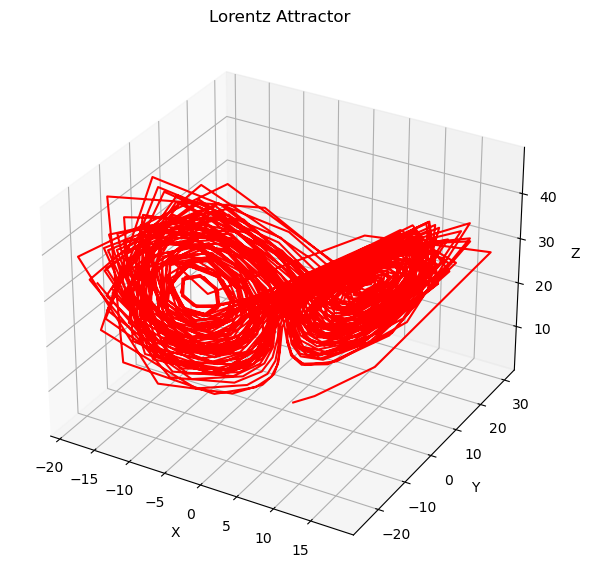

In [97]:
plt.figure(figsize=(10,7))
ax=plt.axes(projection='3d')
ax.plot(x,y,z,color='red')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.title('Lorentz Attractor')
plt.show()